# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [118]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
#basically we will be checking the value and the data sets 
crops.head()
#now checking is there any missing values in it or not 
crops.isnull().sum()
#checking the last 5 rows
crops.tail()
crops.info

<bound method DataFrame.info of         N   P   K        ph    crop
0      90  42  43  6.502985    rice
1      85  58  41  7.038096    rice
2      60  55  44  7.840207    rice
3      74  35  40  6.980401    rice
4      78  42  42  7.628473    rice
...   ...  ..  ..       ...     ...
2195  107  34  32  6.780064  coffee
2196   99  15  27  6.086922  coffee
2197  118  33  30  6.362608  coffee
2198  117  32  34  6.758793  coffee
2199  104  18  30  6.779833  coffee

[2200 rows x 5 columns]>

In [119]:
# Encode categorical target variable 'crop'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
crops["crop"] = label_encoder.fit_transform(crops["crop"])  # Convert crop names to numbers


In [120]:
#split train test 
X=crops.drop(columns=["crop"])
Y=crops["crop"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [121]:
X.isnull().sum()

N     0
P     0
K     0
ph    0
dtype: int64

In [122]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train,Y_train)


LogisticRegression(max_iter=1000)

In [123]:
y_pred = log_reg.predict(X_test)
y_pred

array([16,  1,  6, 11, 16,  3, 17, 10,  1, 16, 15, 19, 21, 11, 14,  0,  0,
        4, 12,  0,  2,  7, 14,  9,  0, 20, 14, 21, 20,  5, 12,  8,  1,  5,
       20,  2,  7,  7, 10,  8,  4, 17,  4,  6, 10,  8,  6, 18,  3, 14, 17,
       19, 18, 21, 12, 13, 17, 17,  5, 18, 10, 13,  5,  1, 17, 20, 16,  4,
       11, 19,  1, 21, 15, 10,  1, 12, 18, 13, 13,  4,  5, 15, 15,  2,  4,
       19, 16,  6,  4, 17,  9, 14,  9,  6,  8,  0,  6,  3, 20, 15, 15, 19,
       16, 13,  9,  7, 18, 10,  8,  1,  0,  2, 14,  0,  8, 15,  2, 10,  1,
       16, 16,  3, 11, 12, 11, 13,  1, 19,  4, 10,  6,  3, 20, 13, 13,  5,
        7,  3, 20, 11,  6, 20, 19, 12, 20, 17,  1, 16,  9, 10, 11,  3,  6,
       21, 13, 11, 18, 21,  7, 13, 11,  3, 11, 11, 18,  5, 16, 11,  0, 19,
        0, 19, 21,  7,  6, 10, 10,  3,  2, 13,  0, 21,  6, 15, 15, 15, 16,
       21,  5, 18,  7,  3, 13,  5, 21,  5,  7,  7,  8, 17, 19,  0, 15, 14,
       19,  9, 13,  2, 17, 15,  3,  7, 11,  3,  1, 12, 19, 11, 16,  8,  6,
        6, 11,  0, 14,  2

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred, Y_test)
confusion_matrix

array([[11,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  2,  5,  0,  0,  0,  1,  0,
         0,  0,  2,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,
         0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  4,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,

<AxesSubplot: >

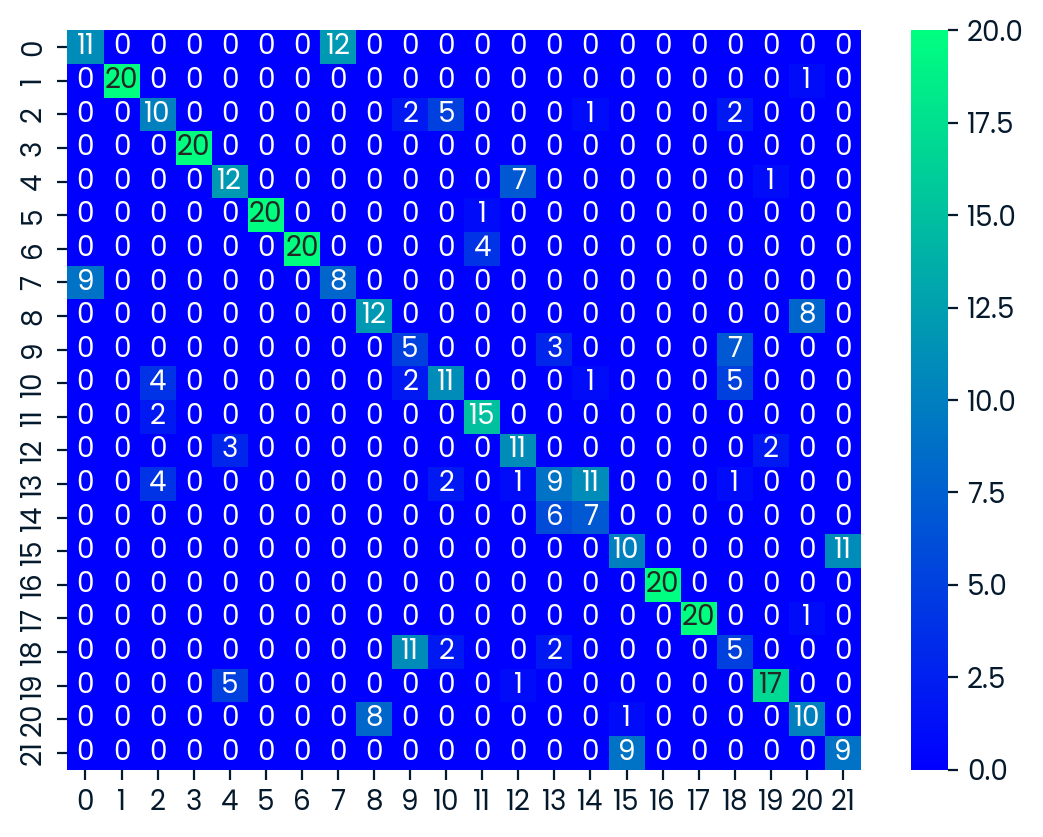

In [125]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, cmap='winter')


In [126]:
accuracy = (confusion_matrix.diagonal().sum()) / (confusion_matrix.sum())
print(f'Accuracy: {accuracy}')

Accuracy: 0.6409090909090909


As the features indicate 
Find the feature in the dataset that produces the best score for predicting "crop".
From this information, create a variable called best_predictive_feature, which:
Should be a dictionary containing the best predictive feature name as a key and the evaluation score (for the metric you chose) as the value.
we will be using a loop in the model to specifically check which the best predictive features 

In [127]:
# Initialize variables to track the best feature
best_feature = None
best_score = 0.0

# Loop through each feature and train a separate model
for feature in X.columns:
    X_train, X_test, y_train, y_test = train_test_split(X[[feature]], y, test_size=0.2, random_state=42, stratify=y)
    
    model = LogisticRegression(max_iter=1000)  # Train logistic regression with one feature
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)  # Predictions
    score = accuracy_score(y_test, y_pred)  # Evaluate accuracy
    
    # Update best feature if the current one performs better
    if score > best_score:
        best_feature = feature
        best_score = score


In [128]:
# Store the result in a dictionary
best_predictive_feature = {best_feature: best_score}

# Print the best feature and its score
print("Best Predictive Feature:", best_predictive_feature)

Best Predictive Feature: {'K': 0.30227272727272725}
